In [1]:
import cekComputerLabs as cek

# Report for numerical lab #1
## Student Name: _______________
## Student ID: _______________

In [2]:
# Import the required python packages here
import pandas as pd                  # Dataframes and reading CSV files
import numpy as np                   # Numerical libraries
import matplotlib.pyplot as plt      # Plotting library
from lmfit import Model              # Curve fitting library
from scipy import stats
from sklearn.metrics import r2_score # function to compute the R^2 score
from IPython.display import Image

In [3]:
# This is a code cell where you can write your python working e.g.
myVariable = 123.456
print("the value of myVariable is {:.2f}".format(myVariable))

the value of myVariable is 123.46


This is a Markdown cell where you can write any text

# Task 0 - plot a function
## Create a python function to evaluate this equation
\begin{equation}
y = \frac{(2x-1)}{3x}
\end{equation}

In [4]:
def myFunc(x):
    return (2*x-1)/3/x

## Plot the function in the range [1:10], include some labels on the axes.

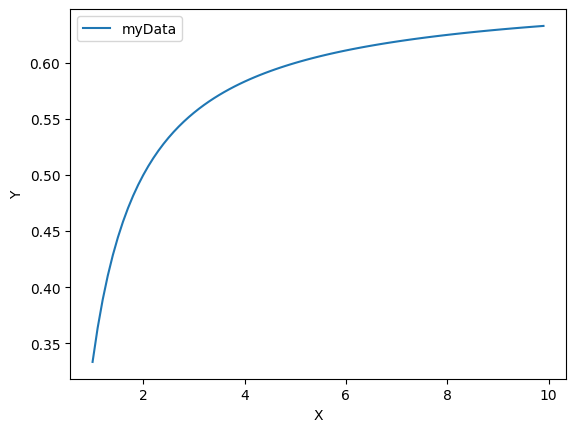

In [5]:
x=np.arange(1,10,0.1)
y=myFunc(x)
fig,ax = plt.subplots()
ax.set(xlabel="X")
ax.set(ylabel="Y")
ax.plot(x,y,label="myData")
plt.legend()
plt.show()

## Add a caption to the figure here

**figure 0:** caption to my first figure

# Task 1 - Average and Confidence Interval

## Generate a data set using the *average and confidence interval* option in the *virtual laboratory* notebook; choose the number of points and set a unique file name. Briefly describe the file content, i.e. the size of each data set.

You can use python to write the values of some variables or you can insert a Markdown cell and write some text, like you would do in Word. Add as many *code* or *Markdown* cell as you need.


In [6]:
# your python code here to import the data in the files
data1 = pd.read_csv("results1.csv")
print("The data sets contains {} data points, labelled '{}' and '{}'.".format(len(data1),*data1.columns))
print(data1)

The data sets contains 10 data points, labelled 'X' and 'Y'.
          X           Y
0  0.739193  108.059438
1  0.912199  121.443650
2  0.933892  106.280714
3  0.993685   79.232815
4  1.077276   57.893713
5  1.091559   51.394904
6  1.109657  105.017721
7  1.145799   80.112875
8  1.175345   84.055026
9  1.355783  127.063077


## Compute the average, standard deviation, and standard error of the values in the "X" and "Y" columns.

In [7]:
# your python code here to compute the averagem standard devaition and confidence interval
avgX = np.mean(data1["X"])
avgY = np.mean(data1["Y"])
stdevX = np.std(data1["X"])
stdevY = np.std(data1["Y"])
sterrX = stdevX / np.sqrt(len(data1))
sterrY = stdevY / np.sqrt(len(data1))

print("The average of the 'X' column is {:.2f}".format(avgX))
print("The average of the 'Y' column is {:.2f}".format(avgY))
print("The standard deviation of the data in the 'X' column is {:.2f}".format(stdevX))
print("The standard deviation of the data in the 'Y' column is {:.2f}".format(stdevY))
print("The standard error of the data in the 'X' column is {:.2f}".format(sterrX))
print("The standard error of the data in the 'Y' column is {:.2f}".format(sterrY))

The average of the 'X' column is 1.05
The average of the 'Y' column is 92.06
The standard deviation of the data in the 'X' column is 0.16
The standard deviation of the data in the 'Y' column is 24.30
The standard error of the data in the 'X' column is 0.05
The standard error of the data in the 'Y' column is 7.69


## Compute the 95% confidence interval

In [8]:
# Extract the t value from scipy for a two tailed distribution
ndf=len(data1)-1
tvalue = stats.t.ppf(q=1-.05/2,df=ndf)
print("The t value for a 95% confidence interval with {} degrees of freedom is {}".format(ndf,tvalue))

CIX = tvalue * sterrX
CIY = tvalue * sterrY
print("The value of X is {:.4f} +/- {:.4f}".format(avgX,CIX))
print("The value of Y is {:.4f} +/- {:.4f}".format(avgY,CIY))

The t value for a 95% confidence interval with 9 degrees of freedom is 2.2621571627409915
The value of X is 1.0534 +/- 0.1146
The value of Y is 92.0554 +/- 17.3864


## Perform the student's t-test to compare your results with the expected literature values, X=1.2 and Y=100.

In [9]:
expX = 1.2
expY = 100
TtestX = (avgX - expX)/sterrX
TtestY = (avgY - expY)/sterrY

if TtestX >= -tvalue and TtestX <= tvalue:
    print("The measured value of X ({:.4f}) is inconsitent with a literature value of {:.4f}\n".format(avgX,expX))
else:
    print("The measured value of X ({:.4f}) is consitent with a literature value of {:.4f}\n".format(avgX,expX))

if TtestY >= -tvalue and TtestY <= tvalue:
    print("The measured value of Y ({:.4f}) is inconsitent with a literature value of {:.4f}\n".format(avgY,expY))
else:
    print("The measured value of Y ({:.4f}) is consitent with a literature value of {:.4f}\n".format(avgY,expY))


The measured value of X (1.0534) is consitent with a literature value of 1.2000

The measured value of Y (92.0554) is inconsitent with a literature value of 100.0000



# Task 2 - Error propagation

## Generate a data set using the *error propagation* option; choose the number of points and set unique a file name. Briefly describe the file content, i.e. the size of each data set.

In [10]:
data2 = pd.read_csv("results2.csv")
print("The data sets contains {} data points, labelled '{}' and '{}'.".format(len(data2),*data2.columns))
print(data2)

The data sets contains 10 data points, labelled 'X' and 'Y'.
           X         Y
0  13.013164  0.160711
1  13.059722  0.172938
2  13.064230  0.265281
3  13.100393  0.007214
4  13.118723  0.046494
5  13.140369 -0.005317
6  13.180334  0.166947
7  13.200234  0.138687
8  13.208910  0.226945
9  13.301406  0.193633


## Compute the 95% confidence interval for the values in the "X" and "Y" columns

In [11]:
def computeCI(x):
    n = len(x)
    avg = np.mean(x)
    std = np.std(x)
    ste = std / np.sqrt(n)
    t = stats.t.ppf(q=1-.05/2,df=n-1)
    return avg,ste*t

res ={}
for col in ["X","Y"]:
    res[col] = computeCI(data2[col])
    print("The value of {} is {:.2f} +/- {:.2f}".format(col,*res[col]))

The value of X is 13.14 +/- 0.06
The value of Y is 0.14 +/- 0.06


## Compute the natural logarithm of "Y" and its uncertainty. Report the error propagation formula that you have used.

In [12]:
val = np.log(res["X"][0])
err = res["X"][1] / val
print("The value of lnY is {:.2f} +/- {:.2f}".format(val,err))

The value of lnY is 2.58 +/- 0.02


## Compute the sum of the two quantities and its uncertainty. Report the error propagation formula that you have used.

In [13]:
val = res["X"][0] + res["Y"][0]
err = np.sqrt(res["X"][1]**2 + res["Y"][1]**2)
print("The value of X+Y is {:.1f} +/- {:.1f}".format(val,err))

The value of X+Y is 13.3 +/- 0.1


# Task 3 - Linear Fit

## Generate a data set and describe the file content.

In [14]:
data3 = pd.read_csv("results3.csv")
print("The data sets contains {} data points, labelled '{}' and '{}'.".format(len(data3),*data3.columns))
print(data3)

The data sets contains 10 data points, labelled 'c' and 'A'.
          c         A
0  0.939018  0.632731
1  1.945353  0.636227
2  4.865864  0.644348
3  4.984827  0.645452
4  6.719028  0.649452
5  6.859437  0.651261
6  6.902108  0.651185
7  8.997293  0.656635
8  9.205191  0.657670
9  9.726256  0.657862


## Plot the data.

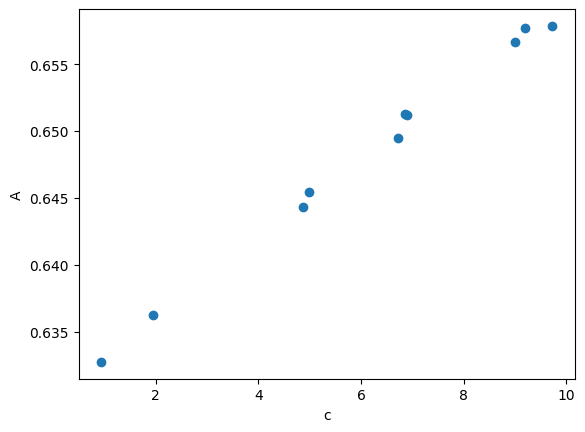

In [15]:
fig,ax = plt.subplots()
ax.scatter(data3["c"],data3["A"])
ax.set(xlabel="c")
ax.set(ylabel="A")
plt.show()

## Fit the data with a line and include a caption below the figure. Report the equation that you used for the fit.

The data have been fitted with the following equation
\begin{equation}
y = ax + b
\end{equation}

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 10
    # variables        = 2
    chi-square         = 2.9429e-06
    reduced chi-square = 3.6786e-07
    Akaike info crit   = -146.386985
    Bayesian info crit = -145.781815
    R-squared          = 0.99566587
[[Variables]]
    a:  0.00291705 +/- 6.8045e-05 (2.33%) (init = 1)
    b:  0.63044634 +/- 4.5813e-04 (0.07%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9081


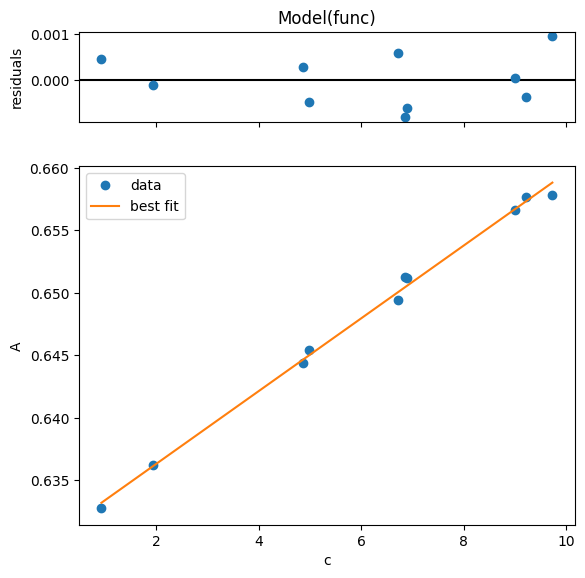

In [16]:
# For clarity we put the values in the dataframe into variables
x = data3["c"]
y = data3["A"]

# Define the function to be used in the fitting
def func(x,a,b):
    y = a*x + b
    return y

# Create the lmfit model
lmodel = Model(func)

# Initialise the function parameters to be optimised
params = lmodel.make_params(a=1,b=1)

# Fit the data:
#   first argument is y
#   second argument are the fitting parameters
#   third argument is x
result = lmodel.fit(y,params,x=x)

# Print the summary of the result
print(result.fit_report())

# Goodness of the fit
fig = result.plot()
ax = fig.gca()
ax.set(xlabel="c")
ax.set(ylabel="A")
plt.show()

**Figure 1.** Plot of the data and best fitting line (bottom). The top panel shows the plot of the residuals.

In [17]:
print("The best value of a is {:.5f} +/- {:.5f}".format(result.params["a"].value , result.params["a"].stderr*1.960))
print("The best value of b is {:.4f} +/- {:.4f}".format(result.params["b"].value , result.params["b"].stderr*1.960))

The best value of a is 0.00292 +/- 0.00013
The best value of b is 0.6304 +/- 0.0009


# Task 4 - Partial fit

## Generate a data set using the *partial fit* option; choose the number of points and set unique a file name. Briefly describe the file content, i.e. the size of each data set.

In [18]:
data4 = pd.read_csv("results4.csv")
print("The data sets contains {} data points, labelled '{}' and '{}'.".format(len(data4),*data4.columns))
print(data4)

The data sets contains 20 data points, labelled 'X' and 'Y'.
             X         Y
0     2.072846 -0.210197
1     2.385350 -0.248162
2     3.445265 -0.355353
3    24.815009 -2.278907
4    34.526243 -3.523023
5    38.728493 -3.707762
6    69.052095 -4.746819
7    81.646308 -4.804594
8    95.829993 -5.343926
9   105.336461 -5.599771
10  108.365003 -5.650827
11  121.312634 -3.907530
12  146.190977 -4.118265
13  159.542716 -3.620626
14  160.130688 -6.566603
15  161.783455 -3.928520
16  165.299844 -5.430878
17  167.051577 -9.403094
18  186.525849 -5.353869
19  197.982680 -7.664778


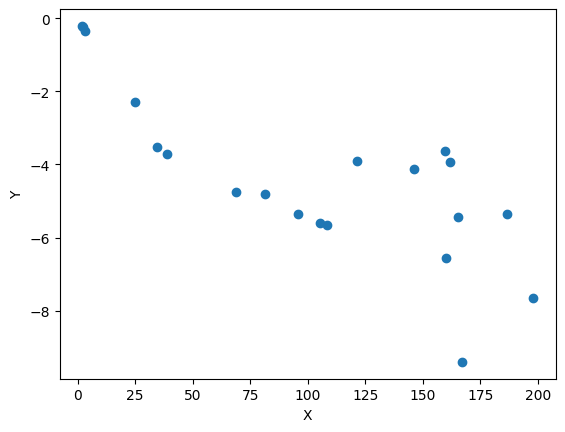

In [19]:
fig,ax = plt.subplots()
ax.scatter(data4["X"],data4["Y"])
ax.set(xlabel=data4.columns[0])
ax.set(ylabel=data4.columns[1])
plt.show()

**Figure 2.** Plot of the data from result4.csv.

## Fit the data points that have $x<50$ and $y>-4$ using a straight line. Report the value of the fitting parameters.

The data have been fitted with the following equation
\begin{equation}
y = mx + q
\end{equation}

In [20]:
# For clarity we put the values in the dataframe into variables
df = data4[ (data4["X"]<50) & (data4["Y"]>-4) ]
x = df["X"]
y = df["Y"]

# Define the function to be used in the fitting
def func(x,m,q):
    y = m*x + q
    return y

# Create the lmfit model
lmodel = Model(func)

# Initialise the function parameters to be optimised
params = lmodel.make_params(m=1,q=1)

# Fit the data:
#   first argument is y
#   second argument are the fitting parameters
#   third argument is x
result = lmodel.fit(y,params,x=x)

print("The best value of m is {:.3f} +/- {:.3f}".format(result.params["m"].value , result.params["q"].stderr*1.960))
print("The best value of q is {:.1f} +/- {:.1f}".format(result.params["q"].value , result.params["m"].stderr*1.960))

The best value of m is -0.097 +/- 0.135
The best value of q is -0.0 +/- 0.0


## Plot the entire dataset and the best fitting line, extrapolated to the entire rage of data. Include a caption to the figure.
You can find how to *slice* a DataFrame in the introductionToPython notebook.

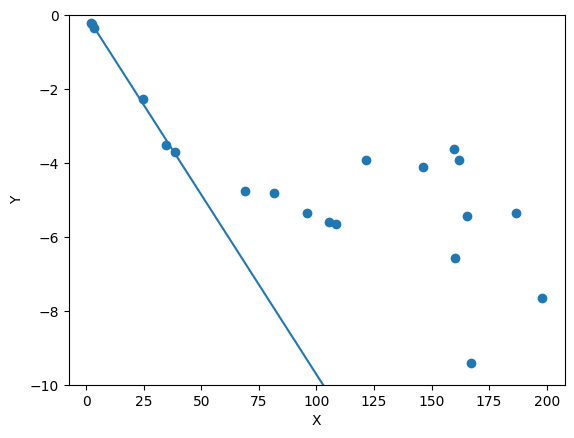

In [21]:
fitLine = func(data4["X"],result.params["m"],result.params["q"])

fig,ax = plt.subplots()
ax.scatter(data4["X"],data4["Y"])
ax.plot(data4["X"],fitLine)
ax.set(xlabel=data4.columns[0])
ax.set(ylabel=data4.columns[1])

ax.set_ylim([-10,0])
plt.show()

**Figure 3.** Plot of the data from result4.csv and the line of best fit for the points with $x<50$ and $y>-4$.

# Task 5- Fit data from multiple files

## Generate three (3) data set using different number of points and describe the file content of the files.

In [22]:
listOfFiles = [
    "results5_1.csv",
    "results5_2.csv",
    "results5_3.csv"
]
numberOfFiles = len(listOfFiles)

allData = []
for f in listOfFiles:
    dd = pd.read_csv(f)
    print("The data sets in file {} contains {} data points, labelled '{}' and '{}'.".format(f,len(dd),*dd.columns))
    allData.append(dd)

The data sets in file results5_1.csv contains 10 data points, labelled 'X' and 'Y'.
The data sets in file results5_2.csv contains 20 data points, labelled 'X' and 'Y'.
The data sets in file results5_3.csv contains 30 data points, labelled 'X' and 'Y'.


## Fit the three data sets using a line

The data have been fitted with the following equation
\begin{equation}
y = ax + b
\end{equation}

In [23]:
def func(x,a,b):
    y = a*x + b
    return y

# Create the lmfit model
lmodel = Model(func)

# Initialise the function parameters to be optimised
params = lmodel.make_params(a=1,b=1)

# Fit the data:
#   first argument is y
#   second argument are the fitting parameters
#   third argument is x
result = []

for i in range(numberOfFiles):
    data = allData[i]
    x = data["X"]
    y = data["Y"]
    rr = lmodel.fit(y,params,x=x)
    result.append(rr)

    # print("File = {}".format(listOfFiles[i]))
    # print("  The best value of a is {:.1f} +/- {:.1f}".format(rr.params["a"].value , rr.params["a"].stderr*1.960))
    # print("  The best value of b is {:.0f} +/- {:.0f}".format(rr.params["b"].value , rr.params["b"].stderr*1.960))

## Report the best fitting parameters in a table

You can generate the Markdown code for a table using this website:

https://www.tablesgenerator.com/markdown_tables

|            | a               | b        |
|:----------:|:---------------:|:--------:|
| results5_1 | 9.2 +/- 0.4     | -2 +/- 2 |
| results5_2 | 9.7 +/- 0.2     | 1 +/- 2  |
| results5_3 | 11.9 +/- 0.2    | -1 +/- 1 |

## Plot the data and their respective best fitting lines

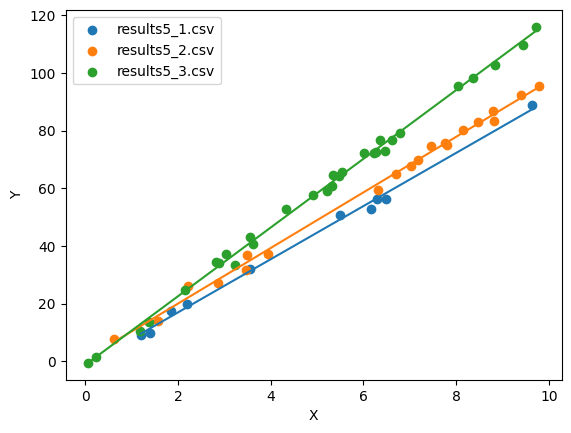

In [24]:
fig,ax = plt.subplots()

for i in range(numberOfFiles):
    data = allData[i]
    fitLine = func(data["X"],result[i].params["a"],result[i].params["b"])

    ax.scatter(data["X"],data["Y"],label=listOfFiles[i])
    ax.plot(data["X"],fitLine)
ax.set(xlabel=data.columns[0])
ax.set(ylabel=data.columns[1])

plt.legend()
plt.show()

# Task 6 - Exponential *vs* linear fit

The data represent rate constants for a certain reaction, which have been measured at different temperatures, and they obey the Arrhenius equation.

\begin{equation}
k_r = A e^{-E_a/RT}
\end{equation}

where $A$ is the frequency factor and $E_a$ is the activation energy.

## Generate a data set and describe the file content, *e.g.* the number of points and the temperature range of the experiments.

In [25]:
data6 = pd.read_csv("results6.csv")
# print(data6)
print("The rate constant has been measured 30 times in the temperature range {}-{} K".format(
    round(np.min(data6["T"],0)),round(np.max(data6["T"],0))))

The rate constant has been measured 30 times in the temperature range 274-463 K


## Compute the frequency factor and the activation energy doing a non-linear fit of the data. Report the best fitting parameters, plot the data with the fitting curve and the residues.

  The best value of the frequency factor is 2e+15 +/- 8e+15 Hz
  The best value of the activation energy is 120000 +/- 20000 J/mol


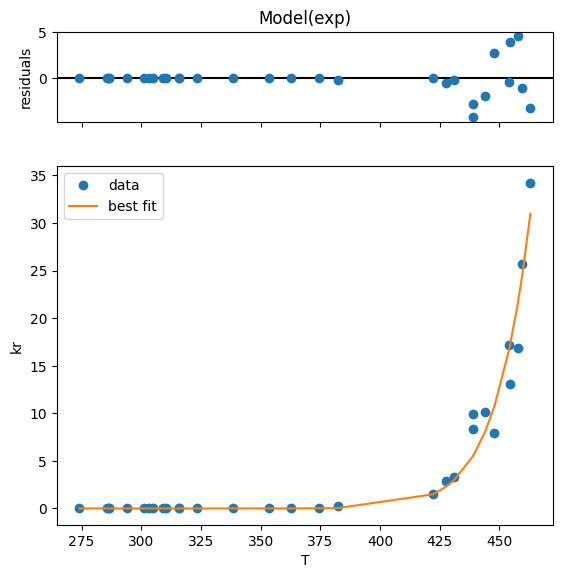

In [26]:
def exp(x,a1=1e12,b1=1):
    R = 8.134 # J/(mol K)
    return a1*np.exp(-b1/(R*x))

lmodel1 = Model(exp)
params1 = lmodel1.make_params()
result1 = lmodel1.fit(data6["kr"],params1,x=data6["T"])
print("  The best value of the frequency factor is {:.1g} +/- {:.1g} Hz".format(
    result1.params["a1"].value, result1.params["a1"].stderr*1.960))
print("  The best value of the activation energy is {:.0f} +/- {:.0f} J/mol".format(
    round(result1.params["b1"].value,-4) , round(result1.params["b1"].stderr*1.960,-4)))

fig = result1.plot()
ax = fig.gca()
ax.set(xlabel="T")
ax.set(ylabel="kr")
plt.show()

## Use the linearised form of the Arrhenius equation and do a linear fit to compute the frequency factor and the activation energy. Report the best fitting parameters, plot the data with the fitting curve and the residues.
\begin{equation}
\ln k_r = \ln A -\frac{E_a}{RT}
\end{equation}

  The best value of the frequency factor is 2e+12 +/- 1e+12 Hz
  The best value of the activation energy is 96000 +/- 2000 J/mol


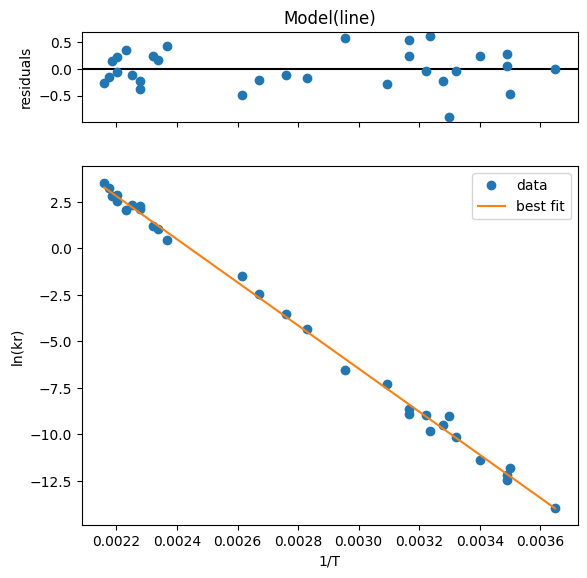

In [27]:
def line(x,a2=1,b2=1):
    return a2 + b2*x

lmodel2 = Model(line)
params2 = lmodel2.make_params()
y = np.log(data6["kr"])
x = 1./data6["T"]
result2 = lmodel2.fit(y,params2,x=x)

a2 =  result2.params["a2"].value
a2Err = result2.params["a2"].stderr*1.960
b2 =  result2.params["b2"].value
b2Err = result2.params["b2"].stderr*1.960

FF = np.exp(a2)
FF_error = np.abs(FF * a2Err)

R = 8.314
Ea = -b2 * R
Ea_error = R * b2Err
print("  The best value of the frequency factor is {:.1g} +/- {:.1g} Hz".format(FF, FF_error))
print("  The best value of the activation energy is {:.0f} +/- {:.0f} J/mol".format(
    round(Ea,-3),round(Ea_error,-3)))

fig = result2.plot()
ax = fig.gca()
ax.set(xlabel="1/T")
ax.set(ylabel="ln(kr)")
plt.show()

## Comment on the accuracy of the exponential and linaer fits and the errors on the fitting parameters.